
# Przygotowanie


Przygotowanie
Przed rozpoczęciem pracy z notatnikiem proszę zmienić jego nazwę dodając na początku numer albumu, imię i nazwisko. {nr_albumu}_{imię}_{nazwisko}_{nazwa}

Po wykonaniu wszystkich zadań proszę przesłać wypełniony notatnik przez platformę ELF za pomocą formularza "Prześlij projekt" w odpowiedniej sekcji.

# Support Vector Machine

Jest to jeden z najbardziej rozpowszechnionych i wszechstronnych modeli uczenia maszynowego. Z jego uzyciem dokonac mozna klasyfikacji liniowej (SVC), nieliniowej jak i regresji (SVR). Na poniższej grafice przedstawione zostało działanie klasyfikatora.

![svc](svc.png)

Analizujac grafike dostrzec mozna dwie oddzielne klasy oddzielone za pomoca prostej. Widoczna linia ciagła rozdziela klasy, a przerywane linie oznaczają margines, czyli możliwe najdalsze oddalenie elementu (np. nowego) jaki zakwalifikowany
zostanie do danej klasy. Maszyny SVM czułe sa na skale danych, przed ich uzyciem zawsze powinna zostać przeprowadzona normalizacja danych (np. min-max, lub standaryzacja).

![svc_example](svc2.jpg)

Równowage pomiedzy marginesami możemy regulować za pomoca hipermarapetru
C. Mniejsze jego wartości poszerzają granice, jednocześnie wprowadzając
więcej jej naruszeń. Im margines jest szerszy, tym własciwosci generalizujace
jakie posiada klasyfikator będę większe. Mniejsza staje się podatność na przeuczenie
(ang. overfitting), ale zmniejsza się skuteczność klasyfikatora. Szukany jest
taki klasyfikator, który podzieli przestrzeń na dwa rozłaczne zbiory odpowiadajace
dwóm klasom, w możliwie optymalny sposób. Podejście opiera się na
znalezieniu granicy decyzyjnej.

Wektory nośne (Support vectors) są to obserwacje (data points), które wystepują najbliżej hiperpłaszczyzny. Punkty te, pomagają lepiej wyznaczyć linię separacji pomiędzy klasami poprzez obliczenie marginesów. Są to najbardziej znaczace obserwacje ze zbioru z punktu widzenia konstrukcji klasyfikatora.

Warto zaznaczyć, że za pomocą klasyfikatora SVC można klasyfikaować dane, które nie są linowo separowalne. Można to osiągnąć przez tzw "sztuczkę kernelową", dzięki czemu możliwe jest zmapowanie obserwacji do wielowymiarowej przestrzeni. Klasyfikator z biblioteki Sklearn posiada parametr *kernel*, który pozwala na zmianę jądra. Dodatkowo, parametr *gamma* pozwala na modyfikację działania samego kernela.

Warto zaznaczyć, że SVC dobrze nadaje się do niewielkich zbiorów danych, gdyż w przypadku dużej ilości staję się on mało wydajny.

Funkcja jaka jest minimalizowana podczas działania klasyfikatora wygląda następująco:

\begin{equation}
min C \sum^m_{i=1}[y^{(i)}cost_{1}(\theta^{T}x^{(i)}) - (1 - y^{(i)})cost_{0}(\theta^{T}x^{(i)})] + \frac{1}{2} \sum^{n}_{i=1}\theta^{2}_{j}
\end{equation}

## Zadanie 0 

Wczytanie danych ze zbioru oraz wizualizacja.

In [3]:
import pandas as pd

df = pd.read_csv('C:/Users/Gabriela/Desktop/studia PK/MOW/datasets/Ankieta.csv')
X = df.iloc[:, [0,1]].values
y = df.iloc[:, 2].map(lambda x: 1 if x == 'Kobieta' else 0)
y = y.values
df.head()

,Waga,Wzrost,Plec
0,55,160,Kobieta
1,78,180,Mezczyzna
2,55,150,Kobieta
3,99,196,Mezczyzna
4,90,180,Mezczyzna


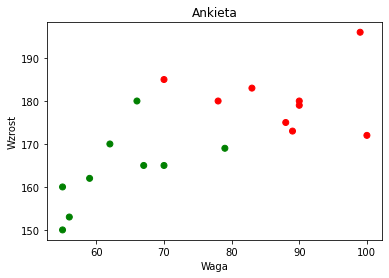

In [4]:
import matplotlib.pyplot as plt
from matplotlib import colors

x = df['Plec'].map(lambda x: 1 if x == 'Kobieta' else 0)
y = df['Waga']
z = df['Wzrost']

df['Plec'] = df['Plec'].map(lambda x: 1 if x == 'Kobieta' else 0)

plt.scatter(y, z, c=x, cmap=colors.ListedColormap(['red', 'green']))
plt.xlabel('Waga')
plt.ylabel('Wzrost')
plt.title('Ankieta')
plt.show()

<ipython-input-5-2b5a5a9366e9>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax=ax)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018A38589880>,
      dtype=object)

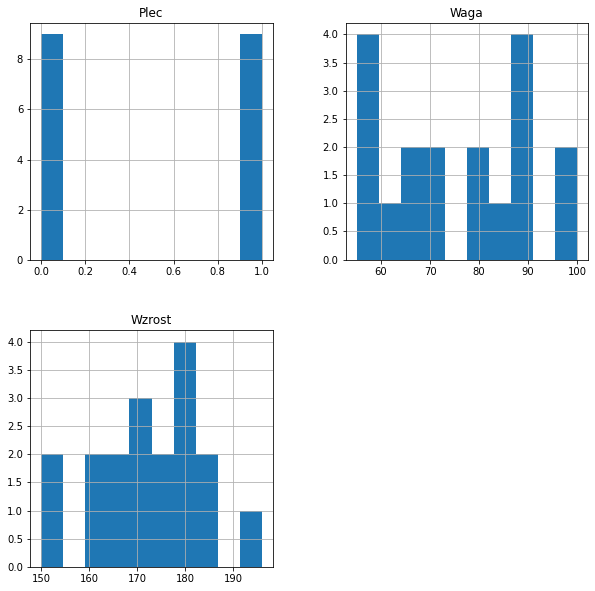

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
df.hist(ax=ax)

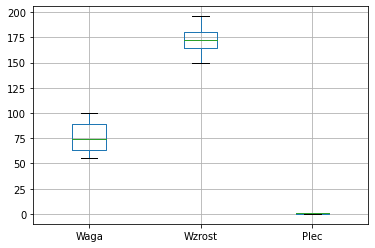

In [6]:
df.boxplot()

Na bazie wykresów box-plot można stwierdzić, że dane posiadają różniące się zakresy, co powoduje potrzebę ich skalowania. Warto zauważyć również, że rozkład klas w zbiorze jest równomierny (patrz: histogram)

## Zadanie 1

Proszę dokonać normalizacji zbioru danych za pomocą standaryzacji oraz narysować wykres box-plot dla wszystkich zmiennych. W jaki sposób zmieniły się dane?

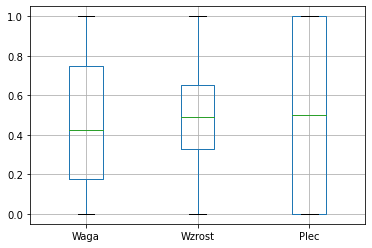

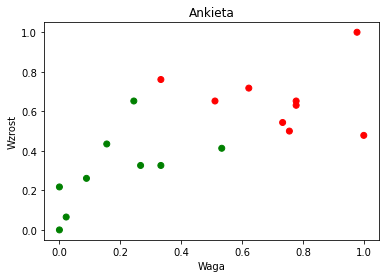

In [7]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

df2 = df.copy()
#scaler = StandardScaler()
scaler = MinMaxScaler()
df2[['Waga', 'Wzrost']] = scaler.fit_transform(df2[['Waga', 'Wzrost']])

df2 = pd.DataFrame(df2)
df2.boxplot()
plt.show()

z2 = df2['Plec']
x2 = df2['Waga']
y2 = df2['Wzrost']
plt.scatter(x2, y2, c=z2, cmap=colors.ListedColormap(['red', 'green']))
plt.xlabel('Waga')
plt.ylabel('Wzrost')
plt.title('Ankieta')
plt.show()



In [8]:
print("Dane zostały znormalizowane za pomocą standaryzacji i dzięki temu znajdują się w tych samych przedziałach liczbowych.")


Dane zostały znormalizowane za pomocą standaryzacji i dzięki temu znajdują się w tych samych przedziałach liczbowych.


## Zadanie 2

W tym zadaniu należy dokonać podziału zbioru danych na uczący oraz testowy. Zbiór uczący będzie służył do treningu klasyfikatora, a testowy do obliczenia ostatecznej skuteczności klasyfikacji. Prosze, by 80% próbek znalazło się w zbiorze uczącym, a 20% w testowym.

In [9]:
# YOUR CODE HERE

from sklearn.model_selection import train_test_split

#dane znormalizowane
X_train, X_test, y_train, y_test = train_test_split(df2[['Waga', 'Wzrost']], df2['Plec'], test_size=0.2)


## Zadanie 3

W tym zadaniu należy dokonać klasyfikacji danych za pomocą klasyfikatora SVC. Proszę obliczyć skuteczność klasyfikatora na danych po, oraz przed standaryzacją i porównać wyniki.

In [10]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

print("dane znormalizowane:")
classifier = SVC()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test) 
y_pred
cm = confusion_matrix(y_test, y_pred)
print ("Precyzja : ", accuracy_score(y_test, y_pred))
#print(cm)
dframe = pd.DataFrame({'Prawdziwe y':y_test, 'Przewidywane y':y_pred})
print(dframe)

print("dane przed normalicacją:")
X_trainorg, X_testorg, y_trainorg, y_testorg = train_test_split(df[['Waga', 'Wzrost']], df['Plec'], test_size=0.2)
classifier.fit(X_trainorg, y_trainorg)
y_predorg = classifier.predict(X_testorg) 
#print(y_predorg)
cm2 = confusion_matrix(y_testorg, y_predorg)
print ("Precyzja2 : ", accuracy_score(y_testorg, y_predorg))
#print(cm)
dframe2 = pd.DataFrame({'Prawdziwe y':y_testorg, 'Przewidywane y':y_predorg})
print(dframe2)


dane znormalizowane:
Precyzja :  0.75
    Prawdziwe y  Przewidywane y
17            0               0
16            1               1
6             1               1
10            1               0
dane przed normalicacją:
Precyzja2 :  0.75
    Prawdziwe y  Przewidywane y
15            0               0
5             0               1
11            0               0
0             1               1


In [304]:
print("Skuteczność klasyfikatora na danych po normalizacji danych: 75%-100% trafności jest większa, niż na danych przed standaryzacją: 50%-75% trafności")

Skuteczność klasyfikatora na danych po normalizacji danych: 75%-100% trafności jest większa, niż na danych przed standaryzacją: 50%-75% trafności


## Zadanie 4

Proszę dobrać odpowiedni parametr C (proszę spróbować z zakresu -1, 1 z krokiem co 0.1). Dla każdego C proszę wyrysować hiperpłaszczyznę utworzoną przez klasyfikator (w formie animimacji, lub inaczej). Proszę przedstawić na wykresie jak zmieniała się skuteczność klasyfikatora w zależności od parametru C. Jakie wnioski można wyciągnąć? Jak wpływa parametr C na wynik?

Precyzja :  0.25
    Prawdziwe y  Przewidywane y
0             1               1
1             0               1
15            0               1
3             0               1
C =  0.1


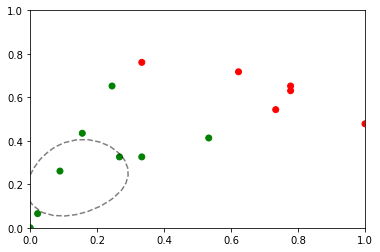

Precyzja :  0.5
    Prawdziwe y  Przewidywane y
0             1               1
1             0               1
15            0               0
3             0               1
C =  0.2


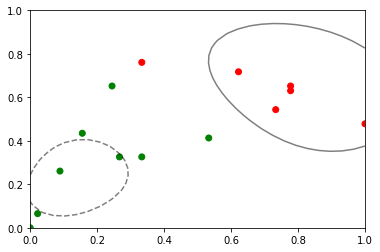

Precyzja :  1.0
    Prawdziwe y  Przewidywane y
0             1               1
1             0               0
15            0               0
3             0               0
C =  0.30000000000000004


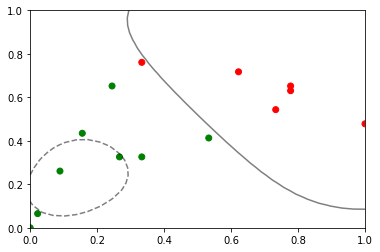

Precyzja :  1.0
    Prawdziwe y  Przewidywane y
0             1               1
1             0               0
15            0               0
3             0               0
C =  0.4


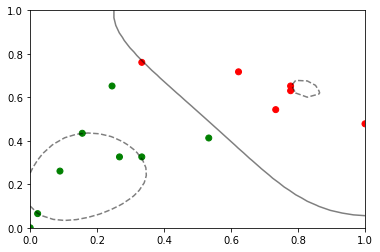

Precyzja :  1.0
    Prawdziwe y  Przewidywane y
0             1               1
1             0               0
15            0               0
3             0               0
C =  0.5


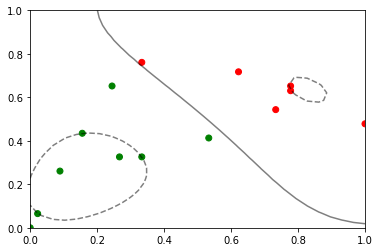

Precyzja :  1.0
    Prawdziwe y  Przewidywane y
0             1               1
1             0               0
15            0               0
3             0               0
C =  0.6


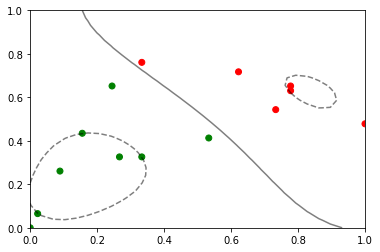

Precyzja :  1.0
    Prawdziwe y  Przewidywane y
0             1               1
1             0               0
15            0               0
3             0               0
C =  0.7000000000000001


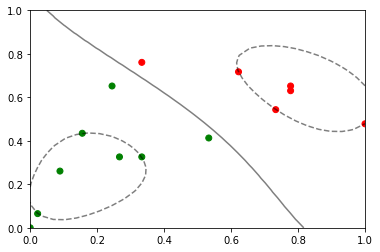

Precyzja :  1.0
    Prawdziwe y  Przewidywane y
0             1               1
1             0               0
15            0               0
3             0               0
C =  0.8


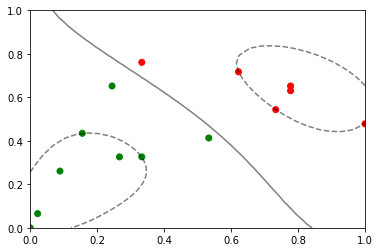

Precyzja :  1.0
    Prawdziwe y  Przewidywane y
0             1               1
1             0               0
15            0               0
3             0               0
C =  0.9


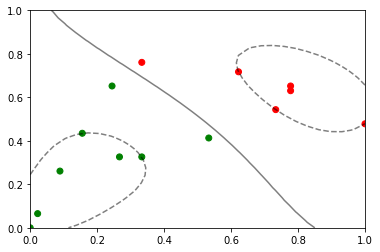

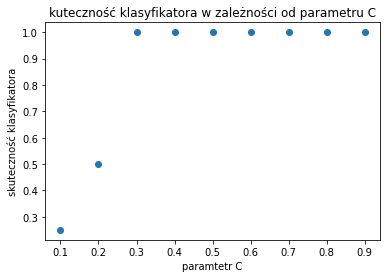

In [305]:
from matplotlib.colors import ListedColormap
tab_i = []
tab_accuracy = []
#X_train, X_test, y_train, y_test = train_test_split(df2[['Waga', 'Wzrost']], df2['Plec'], test_size=0.2)
#for i in np.arange(-1, 1, 0.1):
for i in np.arange(0.1, 1, 0.1):
    classifier = SVC(C=i)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test) 
    cm = confusion_matrix(y_test, y_pred)
    print ("Precyzja : ", accuracy_score(y_test, y_pred))
    tab_i.append(i)
    tab_accuracy.append(accuracy_score(y_test, y_pred))
    dframe = pd.DataFrame({'Prawdziwe y':y_test, 'Przewidywane y':y_pred})
    print(dframe)
    print("C = ", i )

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = classifier.decision_function(xy).reshape(XX.shape)


    plt.scatter(X_train['Waga'], X_train['Wzrost'], c=y_train, cmap=colors.ListedColormap(['red', 'green']))
    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1,0,1], alpha=0.5,
               linestyles=['--', '-', '--'])
    plt.show()

plt.scatter(tab_i, tab_accuracy)
plt.xlabel('paramtetr C')
plt.ylabel('skuteczność klasyfikatora')
plt.title('kuteczność klasyfikatora w zależności od parametru C')
plt.show()

Wartość parametru C musi być większa od 0.
Wraz ze wzrostem parametru C wzrasta skuteczność klasyfikatora oraz margines zmniejsza się.


### Dla zbioru *dataR2* proszę dokonać podobnej analizy danych. Opis zbioru: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra

## Zadanie 5

Proszę zwizualizować dane dla 2 dowolnych zmiennych ze zbioru

   Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification  
0  417.114               1  
1  468.786               1  
2  554.697               1  
3  928.220               1  
4  773.920               1  


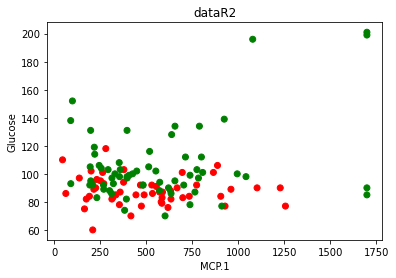

In [406]:
df3 = pd.read_csv('C:/Users/Gabriela/Desktop/dataR2.csv')

print(df.head())

x = df3['Classification']
y = df3['MCP.1']
z = df3['Glucose']


plt.scatter(y, z, c=x, cmap=colors.ListedColormap(['red', 'green']))
plt.xlabel('MCP.1')
plt.ylabel('Glucose')
plt.title('dataR2')
plt.show()

## Zadanie 6

Proszę dokonać standaryzacji danych

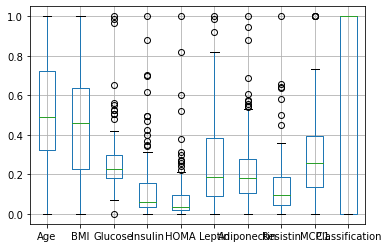

In [407]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df3 = pd.read_csv('C:/Users/Gabriela/Desktop/dataR2.csv')
df3[['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']] = scaler.fit_transform(df4[['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']])
df3['Classification'] = df3['Classification'].map(lambda x: 1 if x == 2 else 0)
df3 = pd.DataFrame(df3)
df3.boxplot()
plt.show()



## Zadanie 7

Trenowanie klasyfikatora. Proszę dokonać treningu klasyfikatora na zbiorze treningowym (X_train, y_train). Proszę użyć różnych wartości parametru C, gamma oraz kernel. Pełna dokumentacja klasyfikatora: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html Wyniki proszę podsumować na odpowiednim wykresie lub tabeli. Test skuteczności klasyfikatora proszę dokonać na zbiorze testowym (X_test, y_test).

In [416]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df3[['Age', 'Glucose']], df3['Classification'], test_size=0.2)
table_data = [['c', 'kernel', 'gamma', 'accuracy']]
for gamma in ['scale', 'auto']:
    for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
        for i in np.arange(0.1, 1, 0.1):
            classifier = SVC(C=i, gamma=gamma, kernel=kernel)
            classifier.fit(X_train, y_train)
            y_pred = classifier.predict(X_test) 
            table_data.append([i, kernel, gamma, accuracy_score(y_test, y_pred)])

table_data = np.array(table_data)
print(table_data)

[['c' 'kernel' 'gamma' 'accuracy']
 ['0.1' 'linear' 'scale' '0.5416666666666666']
 ['0.2' 'linear' 'scale' '0.5416666666666666']
 ['0.30000000000000004' 'linear' 'scale' '0.5416666666666666']
 ['0.4' 'linear' 'scale' '0.5416666666666666']
 ['0.5' 'linear' 'scale' '0.5416666666666666']
 ['0.6' 'linear' 'scale' '0.5416666666666666']
 ['0.7000000000000001' 'linear' 'scale' '0.5416666666666666']
 ['0.8' 'linear' 'scale' '0.5416666666666666']
 ['0.9' 'linear' 'scale' '0.5833333333333334']
 ['0.1' 'poly' 'scale' '0.6666666666666666']
 ['0.2' 'poly' 'scale' '0.6666666666666666']
 ['0.30000000000000004' 'poly' 'scale' '0.6666666666666666']
 ['0.4' 'poly' 'scale' '0.6666666666666666']
 ['0.5' 'poly' 'scale' '0.6666666666666666']
 ['0.6' 'poly' 'scale' '0.6666666666666666']
 ['0.7000000000000001' 'poly' 'scale' '0.6666666666666666']
 ['0.8' 'poly' 'scale' '0.6666666666666666']
 ['0.9' 'poly' 'scale' '0.6666666666666666']
 ['0.1' 'rbf' 'scale' '0.5416666666666666']
 ['0.2' 'rbf' 'scale' '0.791666

Najkorzystniejszym kernelem przy gamma = "scale" okazał się rfb, gdzie przy wyższych wartościach paramatru C skuteczność wyniosła ponad 80%. Przy "gamma" = 'auto', skuteczność była prawie w każdym przypadku jednakowa i wynosiła 0.54 (wyjątek - kernel 'rfb' przy wyższych wartościach parametru C, jednak wartości były bardzo zbliżone do wyniku w pozostałych przypadkach).

## Zadanie 8

Należy wyznaczyć macierze pomyłek dla klasyfikatora. Proszę dokonać wizualizacji wraz z kolorami na wykresie. Przykłady: 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix

https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

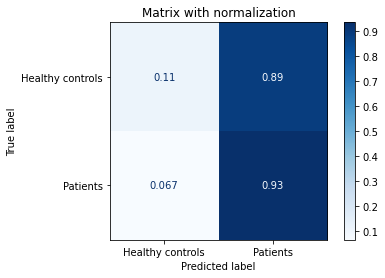

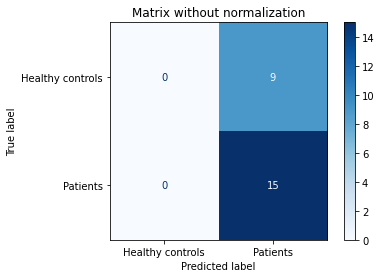

In [415]:
from sklearn.metrics import plot_confusion_matrix
from sklearn import svm, datasets
X_train, X_test, y_train, y_test = train_test_split(df3[['Age', 'Glucose']], df3['Classification'], test_size=0.2)
classifier = svm.SVC(kernel='rbf', C=0.09).fit(X_train, y_train)
title= "Matrix with normalization"
disp = plot_confusion_matrix(classifier, X_test, y_test,
                             display_labels=['Healthy controls','Patients'],
                             cmap=plt.cm.Blues,
                             normalize='true')
disp.ax_.set_title(title)
plt.show()


df4 = pd.read_csv('C:/Users/Gabriela/Desktop/dataR2.csv')
X_train2, X_test2, y_train2, y_test2 = train_test_split(df4[['Age', 'Glucose']], df4['Classification'], test_size=0.2)
classifier = svm.SVC(kernel='rbf', C=0.09).fit(X_train2, y_train2)
title= "Matrix without normalization"
disp = plot_confusion_matrix(classifier, X_test2, y_test2,
                             display_labels=['Healthy controls','Patients'],
                             cmap=plt.cm.Blues)
disp.ax_.set_title(title)

plt.show()